# **Data Mining Project**

**U.S. Accidents Analysis**

**Group 15:**

**1. Sanil Rodrigues**

**2. Aarushi Sharma**

Import necessary libraries for the project.

In [ ]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn import tree
import math
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics

**Connecting Google drive to google colab for importing dataset.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data


In [ ]:
df_accidents = pd.read_csv("US_Accidents_Dec21_updated.csv")
df_accidents = df_accidents.reset_index(drop=True)

In [ ]:
df_accidents

ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.112060  -83.031870         3.230   
1        39.865420  -84.062800  39.865010  -84.048730         0.747   
2        39.102660  -84.524680  39.102090  -84.523960         0.055   
3        41.062130  -81.537840  41.062170  -81.535470         0.123   
4        39.172393  -84.492792  39.170476  -84.501798         0.500   
...            ...         ...        ...         ...           ...   
2845337  34.002480 -117.379360  33.998880 -117.370940         0.543   
2845338  32.766960 -117.148060  32.765550 -117.153630         0.338   
2845339  33.775450 -117.847790  33.777400 -117.857270         0.561   
2845340  33.992460 -118.403020  33.983110 -118.395650         0.772   
2845341  34.133930 -117.230920  34.137360 -117.239340         0.537   

                                               Description  ...  Roundabout  \
0        Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   
1                       At OH-4/OH-235/Exit 41 - Accident.  ...       False   
2                         At I-71/US-50/Exit 1 - Accident.  ...       False   
3                          At Dart Ave/Exit 21 - Accident.  ...       False   
4                       At Mitchell Ave/Exit 6 - Accident.  ...       False   
...                                                    ...  ...         ...   
2845337                           At Market St - Accident.  ...       False   
2845338    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
2845339  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
2845341              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
0         False  False           False          False        False   
1         False  False           False          False        False   
2         False  False           False          False        False   
3         False  False           False          False        False   
4         False  False           False          False        False   
...         ...    ...             ...            ...          ...   
2845337   False  False           False          False        False   
2845338   False  False           False          False        False   
2845339   False  False           False          False        False   
2845340   False  False           False          False        False   
2845341   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0                Night          Night             Night                 Night  
1                Night          Night             Night                 Night  
2                Night          Night             Night                   Day  
3                Night          Night               Day                   Day  
4                  Day            Day               Day                   Day  
... 

**Checking the percentage of null values in each column for original dataset.**

In [ ]:
df_accidents.isnull().sum() * 100 / len(df_accidents)

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   61.290031
Street                    0.000070
Side                      0.000000
City                      0.004815
County                    0.000000
State                     0.000000
Zipcode                   0.046356
Country                   0.000000
Timezone                  0.128596
Airport_Code              0.335601
Weather_Timestamp         1.783125
Temperature(F)            2.434646
Wind_Chill(F)            16.505678
Humidity(%)               2.568830
Pressure(in)              2.080593
Visibility(mi)            2.479350
Wind_Direction            2.592834
Wind_Speed(mph)           5.550967
Precipitation(in)   

**Dropping all the null values.**


- Before dropping null values:
      Original Dataset = 2.8 million records

- After dropping null values:
      Dataset = 0.9 million records


In [ ]:
df_drop = df_accidents.dropna().reset_index(drop=True)
# df_drop

**Dropping variables not required for Exploratory Data Analysis and/or Model Building.**

In [ ]:
df_drop = df_drop.drop(columns = ['Number','ID','End_Lat','End_Lng','Zipcode','Country','Airport_Code','Wind_Chill(F)','Weather_Timestamp','Precipitation(in)'])
# df_drop

**Checking the null values after dropping irrelevant variables.**

In [ ]:
df_drop.isnull().sum() * 100 /len(df_drop)

Severity                 0.0
Start_Time               0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
Side                     0.0
City                     0.0
County                   0.0
State                    0.0
Timezone                 0.0
Temperature(F)           0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit                  0.0
Railway                  0.0
Roundabout               0.0
Station                  0.0
Stop                     0.0
Traffic_Calming          0.0
Traffic_Signal           0.0
Turning_Loop             0.0
Sunrise_Sunset           0.0
Civil_Twilight

In [ ]:
df_viz = df_drop

In [ ]:
df_viz.insert(3,'Start_Date', pd.to_datetime(df_viz['Start_Time'], errors='coerce').dt.date)
df_viz['Start_Time'] = pd.to_datetime(df_viz['Start_Time'], errors='coerce').dt.time
df_viz.insert(5,'End_Date', pd.to_datetime(df_viz['End_Time'], errors='coerce').dt.date)
df_viz['End_Time'] = pd.to_datetime(df_viz['End_Time'], errors='coerce').dt.time

In [ ]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943318 entries, 0 to 943317
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               943318 non-null  int64  
 1   Start_Time             943318 non-null  object 
 2   End_Time               943318 non-null  object 
 3   Start_Date             943318 non-null  object 
 4   Start_Lat              943318 non-null  float64
 5   End_Date               943318 non-null  object 
 6   Start_Lng              943318 non-null  float64
 7   Distance(mi)           943318 non-null  float64
 8   Description            943318 non-null  object 
 9   Street                 943318 non-null  object 
 10  Side                   943318 non-null  object 
 11  City                   943318 non-null  object 
 12  County                 943318 non-null  object 
 13  State                  943318 non-null  object 
 14  Timezone               943318 non-nu

## **DATA VISUALIZATION**

**United States Map of Accidents according to Severity**

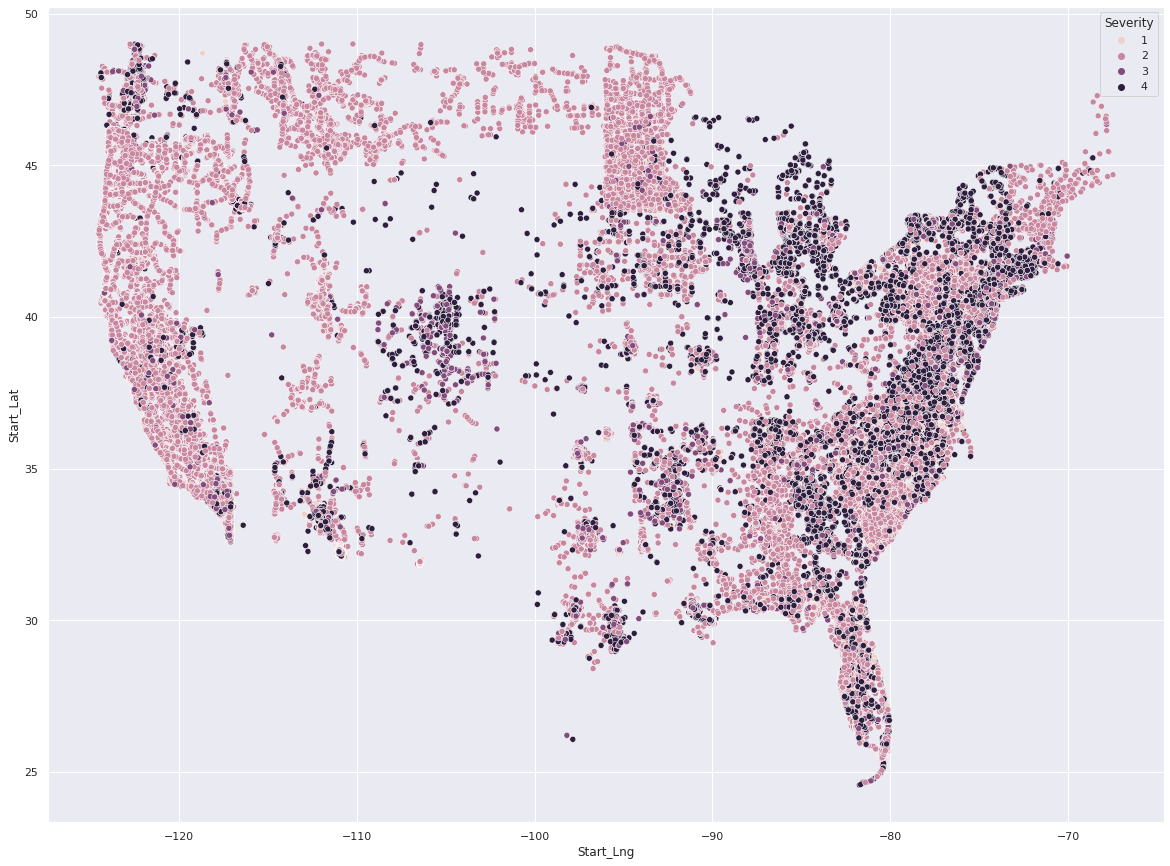

In [ ]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.scatterplot(x ="Start_Lng", y = "Start_Lat", hue="Severity", data=df_viz)

**City Level Analysis**

In [ ]:
city_df = pd.DataFrame(df_viz['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'}).head(20)
fig = px.bar(city_df, y='Cases', x='City', text_auto='.2s', title="City Level analysis")
fig.show()

**State Level Analysis**

In [ ]:
state_df = pd.DataFrame(df_viz['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'}).head(20)
fig = px.bar(state_df, y='Cases', x='State', text_auto='.2s',
            title="State Level analysis")
fig.show()

**United States Map of Accidents according to Time-Zones**

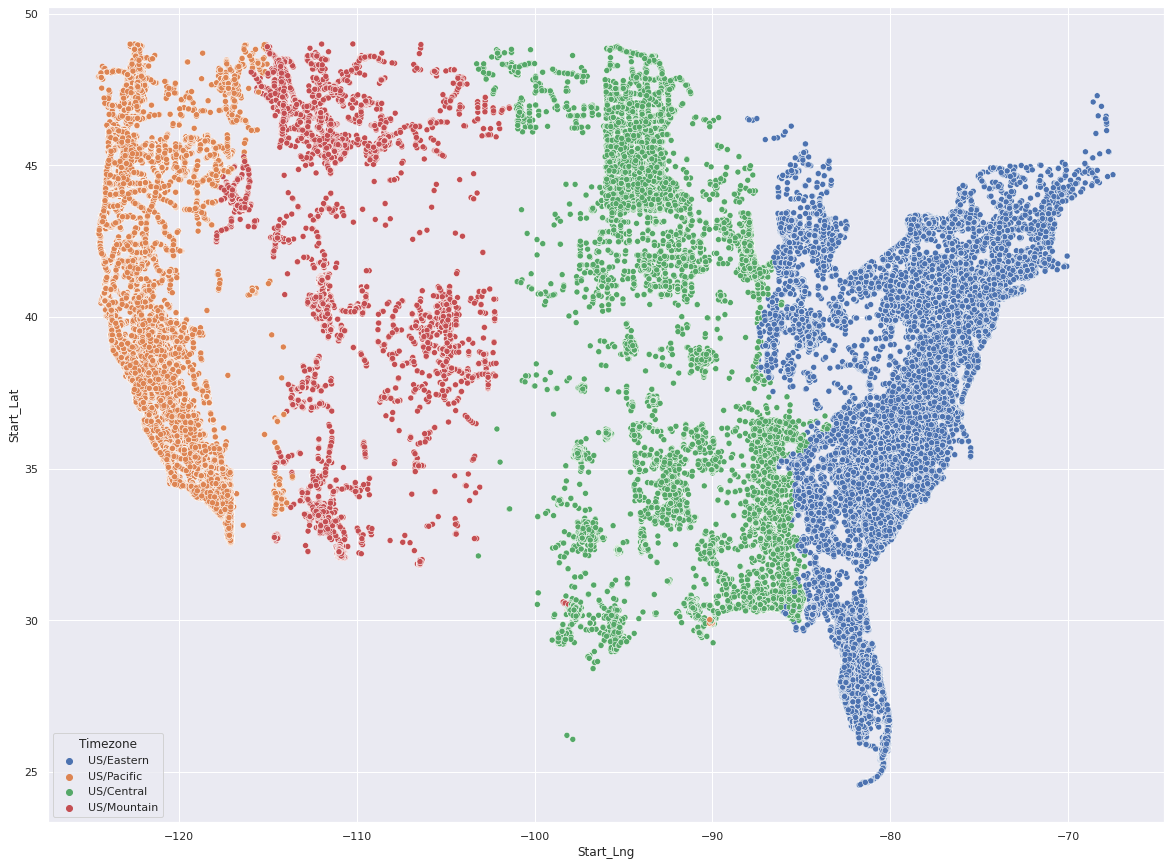

In [ ]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.scatterplot(x ="Start_Lng", y = "Start_Lat", hue="Timezone", data=df_viz)

**Street Level Analysis**

In [ ]:
street_df = pd.DataFrame(df_viz['Street'].value_counts()).reset_index().rename(columns={'index':'Street', 'Street':'Cases'}).head(20)
fig = px.bar(street_df, y='Cases', x='Street', text_auto='.2s', title="Street Level analysis")
fig.show()

**Distibution of all levels of Severity**

In [ ]:
fig = px.pie(df_viz, values='Severity', names='Severity')
fig.show()

NOTE: To view the Severity level for each distribution, hover over the pie chart.

**Weather Analysis**

In [ ]:
df_weather = df_viz.groupby('Weather_Condition')['Severity'].value_counts().head(10)
weather_df = pd.DataFrame(df_weather)
weather_df = weather_df.rename(columns={'Severity':'Cases'})
# df.columns = ['new_col1', 'new_col2', 'new_col3', 'new_col4']
weather_df = weather_df.reset_index()

In [ ]:
# df_weather = pd.DataFrame(df.groupby('Severity')['Weather_Condition'].value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases','Severity':'severity'})
fig = px.bar(weather_df, y='Cases', x='Weather_Condition', text_auto='.2s', color="Severity", barmode="group", title="Weather analysis")
fig.show()

NOTE: To view the number of cases of different levels of Severity, hover over the parts of stacked bar chart. 

**Label Encoding of Categorical Variables for Model Building.**

In [ ]:
df_1 = df_viz.iloc[:,0:10]
# df_1

In [ ]:
from sklearn import preprocessing

label_encode = preprocessing.LabelEncoder()

df_2 =  df_viz[['Side', 'City','County','State','Timezone','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit',
                      'Railway','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Civil_Twilight',
                      'Nautical_Twilight','Astronomical_Twilight','Wind_Direction','Weather_Condition','Roundabout']].apply(label_encode.fit_transform)
# df_2                      

In [ ]:
df_encoded = pd.concat([df_1, df_2], axis = 1, join='inner')
df_encoded

Severity Start_Time  End_Time  Start_Date  Start_Lat    End_Date  \
0              4   18:20:58  00:20:58  2016-02-09  40.451120  2016-02-10   
1              4   18:20:58  00:20:58  2016-02-09  40.354290  2016-02-10   
2              4   06:18:49  12:18:49  2016-02-10  40.728130  2016-02-10   
3              2   08:35:27  14:35:27  2016-02-10  41.831930  2016-02-10   
4              2   12:54:39  18:54:39  2016-02-10  41.483390  2016-02-10   
...          ...        ...       ...         ...        ...         ...   
943313         3   16:19:21  16:48:04  2019-08-23  37.609816  2019-08-23   
943314         4   17:25:12  17:54:00  2019-08-23  38.995930  2019-08-23   
943315         4   17:25:12  17:54:00  2019-08-23  39.003170  2019-08-23   
943316         3   01:16:01  01:44:53  2019-08-23  34.121320  2019-08-23   
943317         3   10:32:30  11:01:40  2019-08-23  34.485189  2019-08-23   

         Start_Lng  Distance(mi)  \
0       -85.150480         6.690   
1       -85.149930         6.690   
2       -84.789650         1.206   
3       -80.101430         0.824   
4       -81.662970         0.462   
...            ...           ...   
943313 -122.493720         0.109   
943314 -121.672020         0.708   
943315 -121.662679         0.708   
943316 -117.254540         0.000   
943317 -120.229276         0.197   

                                              Description            Street  \
0       Closed between IN-26 and IN-67 - Road closed d...   W State Road 26   
1       Closed between IN-67 and IN-26 - Road closed d...     N Meridian St   
2       Closed between Willshire and US-33/Rockford Rd...    State Route 49   
3            Between Irish Rd and Blystone Rd - Accident.        Highway 99   
4                           At I-490/Exit 161 - Accident.           Iron Ct   
...                                                   ...               ...   
943313  At Fassler Ave/Rockaway Beach Ave - Accident. ...     San Marlo Way   
943314  Closed between Yuba City and CA-99/Sawtelle Av...       Thompson Rd   
943315  Closed between CA-99/Sawtelle Ave and Yuba Cit...          Tudor Rd   
943316                      At San Bernardino - Accident.    E Base Line St   
943317  At Gaviota Roadside Rest Area - Accident. Lane...    US Highway 101   

        ...  Traffic_Calming  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
0       ...                0               0             0               1   
1       ...                0               0             0               1   
2       ...                0               0             0               1   
3       ...                0               0             0               0   
4       ...                0               0             0               0   
...     ...              ...             ...           ...             ...   
943313  ...                0               0             0               0   
943314  ...                0               0             0               0   
943315  ...                0               0             0               0   
943316  ...                0               0             0               1   
943317  ...                0               0             0               0   

        Civil_Twilight  Nautical_Twilight  Astronomical_Twilight  \
0                    0                  0                      0   
1                    0                  0                      0   
2                    1                  1                      0   
3                    0                  0                      0   
4                    0                  0                      0   
...                ...                ...                    ...   
943313               0                  0                      0   
943314               0                  0                      0   
943315               0                  0                      0   
943316               1                  1                      1   
943317               0      

**Dropping columns not required for model building.**

In [ ]:
df_encoded = df_encoded.drop(columns=['Start_Time','End_Time','Start_Date','End_Date','Start_Lng','Start_Lat','Description','Street'])
# df_encoded.info()

**Splitting the dataset into Input Dataset and Target Dataset.**

In [ ]:
X = df_encoded.drop(columns=['Severity']).sample(n=100000, random_state=1).reset_index(drop=True)
Y = df_encoded[['Severity']].sample(n=100000,random_state=1).reset_index(drop=True)

**Standardizing the Input Dataset.**

In [ ]:
from sklearn.preprocessing import StandardScaler

feature_scale = StandardScaler()

X_stand = feature_scale.fit_transform(X)
X_stand = pd.DataFrame(X_stand, columns = X.columns).reset_index(drop=True)

In [ ]:
X_stand

Distance(mi)      Side      City    County     State  Timezone  \
0          0.058689  0.880431 -0.012030 -0.109465 -1.039435  1.424613   
1         -0.278415 -1.135808  1.244007  1.541956 -1.039435  1.424613   
2         -0.310691  0.880431  0.767504  0.258859  1.094727  1.424613   
3         -0.228208  0.880431  1.446172  0.648317 -1.106128  0.495546   
4         -0.321449  0.880431 -0.577659 -0.764599  1.294805 -0.433521   
...             ...       ...       ...       ...       ...       ...   
99995     -0.044116 -1.135808 -0.763739 -1.866552 -0.705972 -0.433521   
99996      1.127378 -1.135808 -0.655482 -0.009836 -1.106128  0.495546   
99997     -0.305909  0.880431  0.389693  0.467174 -0.172432  1.424613   
99998     -0.273633  0.880431  0.184919  0.138097 -0.705972 -0.433521   
99999     -0.225817 -1.135808  0.262307 -0.426465 -0.705972 -0.433521   

        Amenity      Bump  Crossing  Give_Way  ...  Traffic_Calming  \
0     -0.145638 -0.028822 -0.386385 -0.047593  ...        -0.034371   
1     -0.145638 -0.028822 -0.386385 -0.047593  ...        -0.034371   
2     -0.145638 -0.028822 -0.386385 -0.047593  ...        -0.034371   
3     -0.145638 -0.028822  2.588094 -0.047593  ...        -0.034371   
4     -0.145638 -0.028822 -0.386385 -0.047593  ...        -0.034371   
...         ...       ...       ...       ...  ...              ...   
99995 -0.145638 -0.028822 -0.386385 -0.047593  ...        -0.034371   
99996 -0.145638 -0.028822 -0.386385 -0.047593  ...        -0.034371   
99997 -0.145638 -0.028822 -0.386385 -0.047593  ...        -0.034371   
99998 -0.145638 -0.028822 -0.386385 -0.047593  ...        -0.034371   
99999 -0.145638 -0.028822 -0.386385 -0.047593  ...        -0.034371   

       Traffic_Signal  Turning_Loop  Sunrise_Sunset  Civil_Twilight  \
0           -0.397354           0.0       -0.767524       -0.704812   
1           -0.397354           0.0        1.302892        1.418819   
2           -0.397354           0.0       -0.767524       -0.704812   
3            2.516650           0.0        1.302892        1.418819   
4            2.516650           0.0       -0.767524       -0.704812   
...               ...           ...             ...             ...   
99995       -0.397354           0.0       -0.767524       -0.704812   
99996       -0.397354           0.0        1.302892        1.418819   
99997       -0.397354           0.0       -0.767524       -0.704812   
99998       -0.397354           0.0       -0.767524       -0.704812   
99999       -0.397354           0.0       -0.767524       -0.704812   

       Nautical_Twilight  Astronomical_Twilight  Wind_Direction  \
0              -0.632728              -0.572223        0.858674   
1               1.580458               1.747570       -1.273456   
2              -0.632728              -0.572223        1.142958   
3               1.580458               1.747570        0.005822   
4              -0.632728              -0.572223       -0.562746   
...                  ...                    ...             ...   
99995          -0.632728              -0.572223       -0.989172   
99996           1.580458               1.747570        0.858674   
99997          -0.632728              -0.572223       -1.131314   
99998          -0.632728              -0.572223       -1.131314   
99999          -0.632728              -0.572223       -1.273456   

       Weather_Condition  Roundabout  
0              -0.613150   -0.009487  
1              -0.613150   -0.009487  
2              -0.613150   -0.009487  
3              -0.613150   -0.009487  
4              -0.613150   -0.009487  
...                  ...         ...  
99995           1.601227   -0.009487  
99996          -0.613150   -0.009487  
99997          -0.853844   -0.009487  
99998          -0.613150   -0.009487  
99999          -0.613150   -0.009487  

[100000 rows x 25 columns]

**Checking the correlation between the input variables to verify the redundant variables.**

In [ ]:
df_X_corr = X_stand.corr(method = 'pearson')
df_X_corr

Distance(mi)      Side      City    County     State  \
Distance(mi)               1.000000  0.003439 -0.005985 -0.011608  0.035152   
Side                       0.003439  1.000000  0.010306  0.001454  0.008969   
City                      -0.005985  0.010306  1.000000  0.202070 -0.144485   
County                    -0.011608  0.001454  0.202070  1.000000 -0.165995   
State                      0.035152  0.008969 -0.144485 -0.165995  1.000000   
Timezone                   0.027399  0.020847  0.104132  0.163482 -0.411505   
Amenity                   -0.021803  0.001550  0.018895  0.009514  0.022045   
Bump                      -0.004947  0.000871  0.008021 -0.008848 -0.017337   
Crossing                  -0.053823 -0.001059  0.080214  0.045626 -0.046577   
Give_Way                  -0.001227 -0.008200  0.005892  0.011506  0.012144   
Junction                   0.005315 -0.008560 -0.008536 -0.015298  0.008085   
No_Exit                   -0.004598 -0.003963  0.011600  0.004185 -0.015409   
Railway                   -0.004238  0.004608  0.004765  0.004256 -0.004409   
Station                   -0.032348 -0.008698  0.050176  0.035169 -0.088984   
Stop                       0.008619  0.015325  0.027883  0.010159 -0.020721   
Traffic_Calming           -0.006294 -0.000278  0.007402 -0.004639 -0.017097   
Traffic_Signal            -0.060145 -0.028117  0.007523 -0.008590  0.016054   
Turning_Loop                    NaN       NaN       NaN       NaN       NaN   
Sunrise_Sunset             0.007453  0.018192 -0.017301 -0.000583  0.022343   
Civil_Twilight             0.002670  0.019295 -0.019163  0.001092  0.020723   
Nautical_Twilight         -0.001019  0.019320 -0.015995  0.001424  0.016168   
Astronomical_Twilight     -0.005119  0.021063 -0.014894 -0.001335  0.018394   
Wind_Direction             0.010028 -0.002529  0.006389 -0.006063  0.023530   
Weather_Condition          0.003607 -0.021116  0.003270 -0.020617  0.055458   
Roundabout                -0.001708  0.001977 -0.000515  0.005387 -0.001987   

                       Timezone   Amenity      Bump  Crossing  Give_Way  ...  \
Distance(mi)           0.027399 -0.021803 -0.004947 -0.053823 -0.001227  ...   
Side                   0.020847  0.001550  0.000871 -0.001059 -0.008200  ...   
City                   0.104132  0.018895  0.008021  0.080214  0.005892  ...   
County                 0.163482  0.009514 -0.008848  0.045626  0.011506  ...   
State                 -0.411505  0.022045 -0.017337 -0.046577  0.012144  ...   
Timezone               1.000000  0.005591  0.018799 -0.041076 -0.014959  ...   
Amenity                0.005591  1.000000  0.005542  0.116214 -0.003978  ...   
Bump                   0.018799  0.005542  1.000000  0.018817 -0.001372  ...   
Crossing              -0.041076  0.116214  0.018817  1.000000  0.029843  ...   
Give_Way              -0.014959 -0.003978 -0.001372  0.029843  1.000000  ...   
Junction               0.006289 -0.005801 -0.001966 -0.017151 -0.003246  ...   
No_Exit               -0.007973  0.010416  0.005332  0.036784  0.009948  ...   
Railway                0.026326  0.030949  0.006792  0.236865  0.000904  ...   
Station               -0.017922  0.117505  0.001252  0.130049 -0.008121  ...   
Stop                   0.066720  0.017787  0.027988  0.077528  0.039419  ...   
Traffic_Calming        0.014326  0.007249  0.838536  0.023975  0.004498  ...   
Traffic_Signal        -0.043366  0.084547 -0.005381  0.348412  0.030795  ...   
Turning_Loop                NaN       NaN       NaN       NaN       NaN  ...   
Sunrise_Sunset         0.032776 -0.007399  0.000166 -0.034088 -0.001212  ...   
Civil_Twilight         0.032403 -0.006155  0.001072 -0.030968 -0.002239  ...   
Nautical_Twilight      0.031127 -0.001054  0.000977 -0.026708 -0.002149  ...   
Astronomical_Twilight  0.028792 -0.001681 -0.001187 -0.023822  0.000612  ...   
Wind_Direction         0.032100  0.005094  0.007325  0.004609 -0.003704  ...   
Weather_Condition     -0.109251  0.011658 -0.008

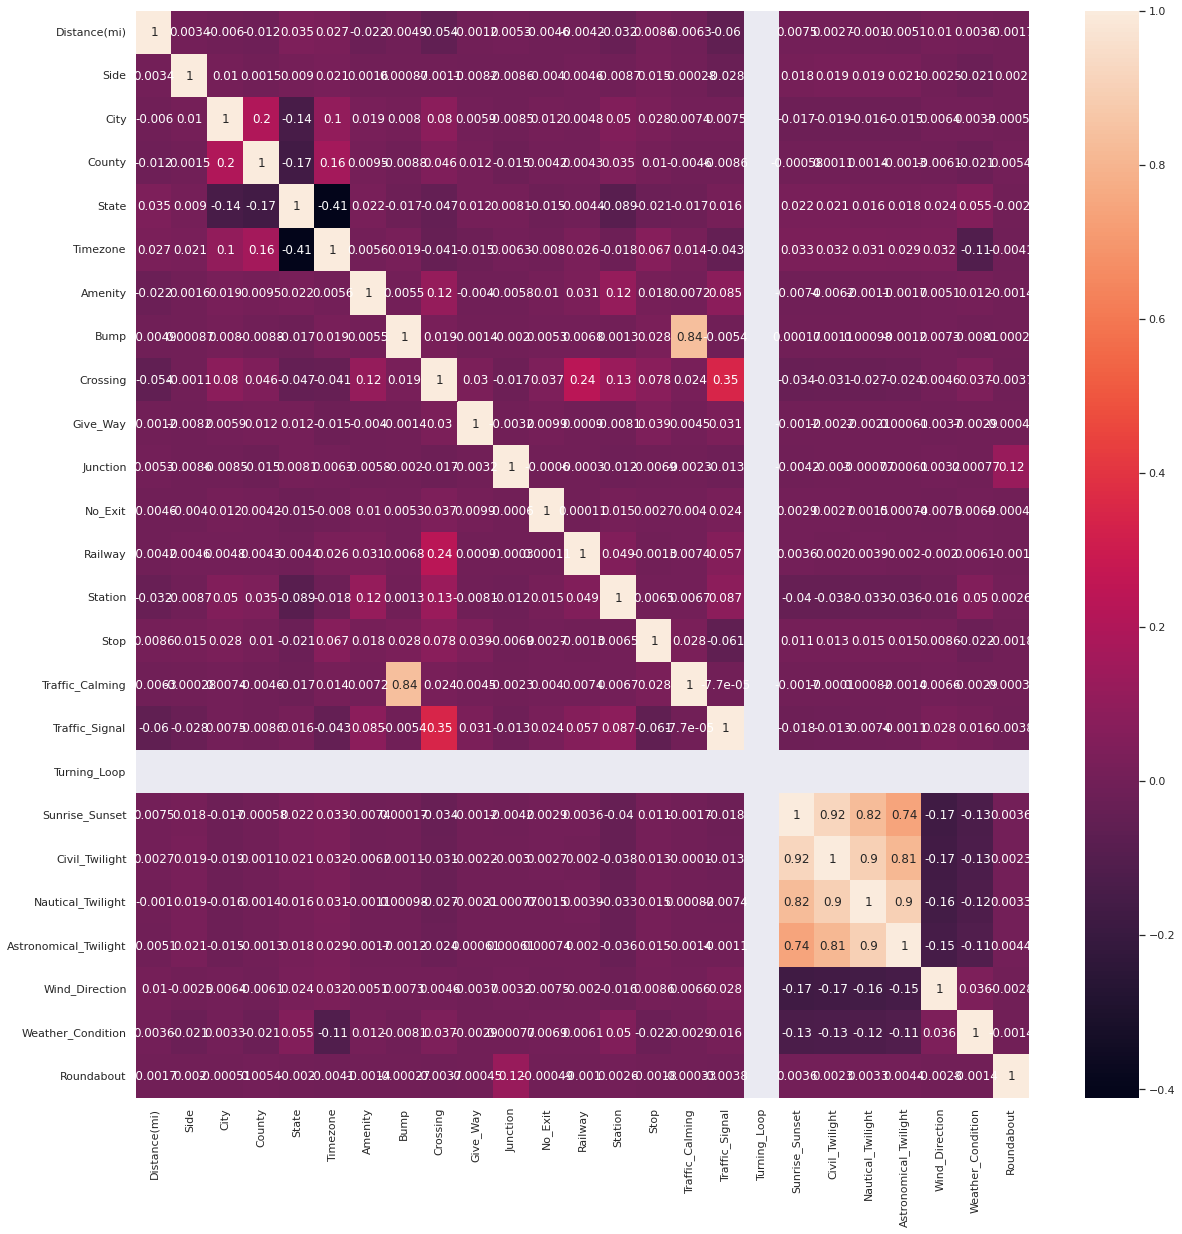

In [ ]:
sns.set(rc = {'figure.figsize' : (20,20)})
sns.heatmap(df_X_corr, annot = True)

**Dropping the redundant variables.**

**Checking for variables having greater than 0.7 pearson correlation coefficient..**

In [ ]:
upper_tri = df_X_corr.where(np.triu(np.ones(df_X_corr.shape),k=1).astype(np.bool))
# upper_tri
df_corr_remove = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70 )]
df_corr_remove = pd.DataFrame(df_corr_remove).rename(columns={0:'col_drop'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
df_corr_remove

col_drop
0        Traffic_Calming
1         Civil_Twilight
2      Nautical_Twilight
3  Astronomical_Twilight

In [ ]:
X = X_stand.drop(columns = df_corr_remove['col_drop'])
X = X.drop(columns = ['Turning_Loop'])
X

Distance(mi)      Side      City    County     State  Timezone  \
0          0.058689  0.880431 -0.012030 -0.109465 -1.039435  1.424613   
1         -0.278415 -1.135808  1.244007  1.541956 -1.039435  1.424613   
2         -0.310691  0.880431  0.767504  0.258859  1.094727  1.424613   
3         -0.228208  0.880431  1.446172  0.648317 -1.106128  0.495546   
4         -0.321449  0.880431 -0.577659 -0.764599  1.294805 -0.433521   
...             ...       ...       ...       ...       ...       ...   
99995     -0.044116 -1.135808 -0.763739 -1.866552 -0.705972 -0.433521   
99996      1.127378 -1.135808 -0.655482 -0.009836 -1.106128  0.495546   
99997     -0.305909  0.880431  0.389693  0.467174 -0.172432  1.424613   
99998     -0.273633  0.880431  0.184919  0.138097 -0.705972 -0.433521   
99999     -0.225817 -1.135808  0.262307 -0.426465 -0.705972 -0.433521   

        Amenity      Bump  Crossing  Give_Way  Junction   No_Exit   Railway  \
0     -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
1     -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
2     -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
3     -0.145638 -0.028822  2.588094 -0.047593 -0.068202 -0.051155 -0.106764   
4     -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
...         ...       ...       ...       ...       ...       ...       ...   
99995 -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
99996 -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
99997 -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
99998 -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
99999 -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   

        Station      Stop  Traffic_Signal  Sunrise_Sunset  Wind_Direction  \
0     -0.231125 -0.193219       -0.397354       -0.767524        0.858674   
1     -0.231125 -0.193219       -0.397354        1.302892       -1.273456   
2     -0.231125 -0.193219       -0.397354       -0.767524        1.142958   
3     -0.231125 -0.193219        2.516650        1.302892        0.005822   
4     -0.231125 -0.193219        2.516650       -0.767524       -0.562746   
...         ...       ...             ...             ...             ...   
99995 -0.231125 -0.193219       -0.397354       -0.767524       -0.989172   
99996 -0.231125 -0.193219       -0.397354        1.302892        0.858674   
99997 -0.231125 -0.193219       -0.397354       -0.767524       -1.131314   
99998 -0.231125 -0.193219       -0.397354       -0.767524       -1.131314   
99999 -0.231125 -0.193219       -0.397354       -0.767524       -1.273456   

       Weather_Condition  Roundabout  
0              -0.613150   -0.009487  
1              -0.613150   -0.009487  
2              -0.613150   -0.009487  
3              -0.613150   -0.009487  
4              -0.613150   -0.009487  
...                  ...         ...  
99995           1.601227   -0.009487  
99996          -0.613150   -0.009487  
99997          -0.853844   -0.009487  
99998          -0.613150   -0.009487  
99999          -0.613150   -0.009487  

[100000 rows x 20 columns]

## **MODEL BUILDING AND IMPLEMENTATION**

**Splitting the Input and Target Data into Training and Test Dataset with 75% and 25% ratio, i.e., 75% - Training Data and 35% Test Data.**

In [ ]:
Y = Y.values
Y = Y.ravel()
Y

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [ ]:
X_train

Distance(mi)      Side      City    County     State  Timezone  \
0         -0.060851  0.880431 -0.012030 -0.109465 -1.039435  1.424613   
1         -0.198323  0.880431  0.556208  0.461136 -0.705972 -0.433521   
2         -0.078783  0.880431  1.357915 -1.126885  0.427802 -0.433521   
3         -0.029771 -1.135808 -0.787651  1.028717 -1.039435  1.424613   
4         -0.225817 -1.135808  0.184919  0.138097 -0.705972 -0.433521   
...             ...       ...       ...       ...       ...       ...   
74995     -0.326231 -1.135808  1.277049  1.037774 -1.039435  1.424613   
74996     -0.243748 -1.135808 -1.128072 -1.317085  1.494883 -1.362589   
74997     -0.120622 -1.135808  1.026624 -2.307333 -1.039435  1.424613   
74998      0.870367  0.880431  0.663160  0.494345  0.161031 -1.362589   
74999      0.957631  0.880431  0.884456 -1.739752 -0.039047 -0.433521   

        Amenity      Bump  Crossing  Give_Way  Junction   No_Exit   Railway  \
0     -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
1     -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
2     -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
3     -0.145638 -0.028822  2.588094 -0.047593 -0.068202 -0.051155  9.366491   
4     -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
...         ...       ...       ...       ...       ...       ...       ...   
74995 -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
74996 -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
74997 -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
74998 -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   
74999 -0.145638 -0.028822 -0.386385 -0.047593 -0.068202 -0.051155 -0.106764   

        Station      Stop  Traffic_Signal  Sunrise_Sunset  Wind_Direction  \
0     -0.231125 -0.193219       -0.397354        1.302892       -1.273456   
1      4.326659 -0.193219       -0.397354        1.302892       -0.562746   
2     -0.231125 -0.193219       -0.397354       -0.767524       -0.136320   
3     -0.231125  5.175471       -0.397354       -0.767524       -1.273456   
4     -0.231125 -0.193219       -0.397354       -0.767524       -0.847030   
...         ...       ...             ...             ...             ...   
74995 -0.231125 -0.193219       -0.397354       -0.767524        0.005822   
74996 -0.231125 -0.193219       -0.397354       -0.767524       -0.278462   
74997 -0.231125 -0.193219       -0.397354       -0.767524        1.427242   
74998 -0.231125 -0.193219       -0.397354       -0.767524        1.569384   
74999 -0.231125 -0.193219       -0.397354       -0.767524       -1.273456   

       Weather_Condition  Roundabout  
0              -0.613150   -0.009487  
1              -0.853844   -0.009487  
2              -0.613150   -0.009487  
3              -0.613150   -0.009487  
4               1.745643   -0.009487  
...                  ...         ...  
74995          -0.613150   -0.009487  
74996           1.408672   -0.009487  
74997          -0.853844   -0.009487  
74998           1.601227   -0.009487  
74999          -0.613150   -0.009487  

[75000 rows x 20 columns]

**KNN-Classification**

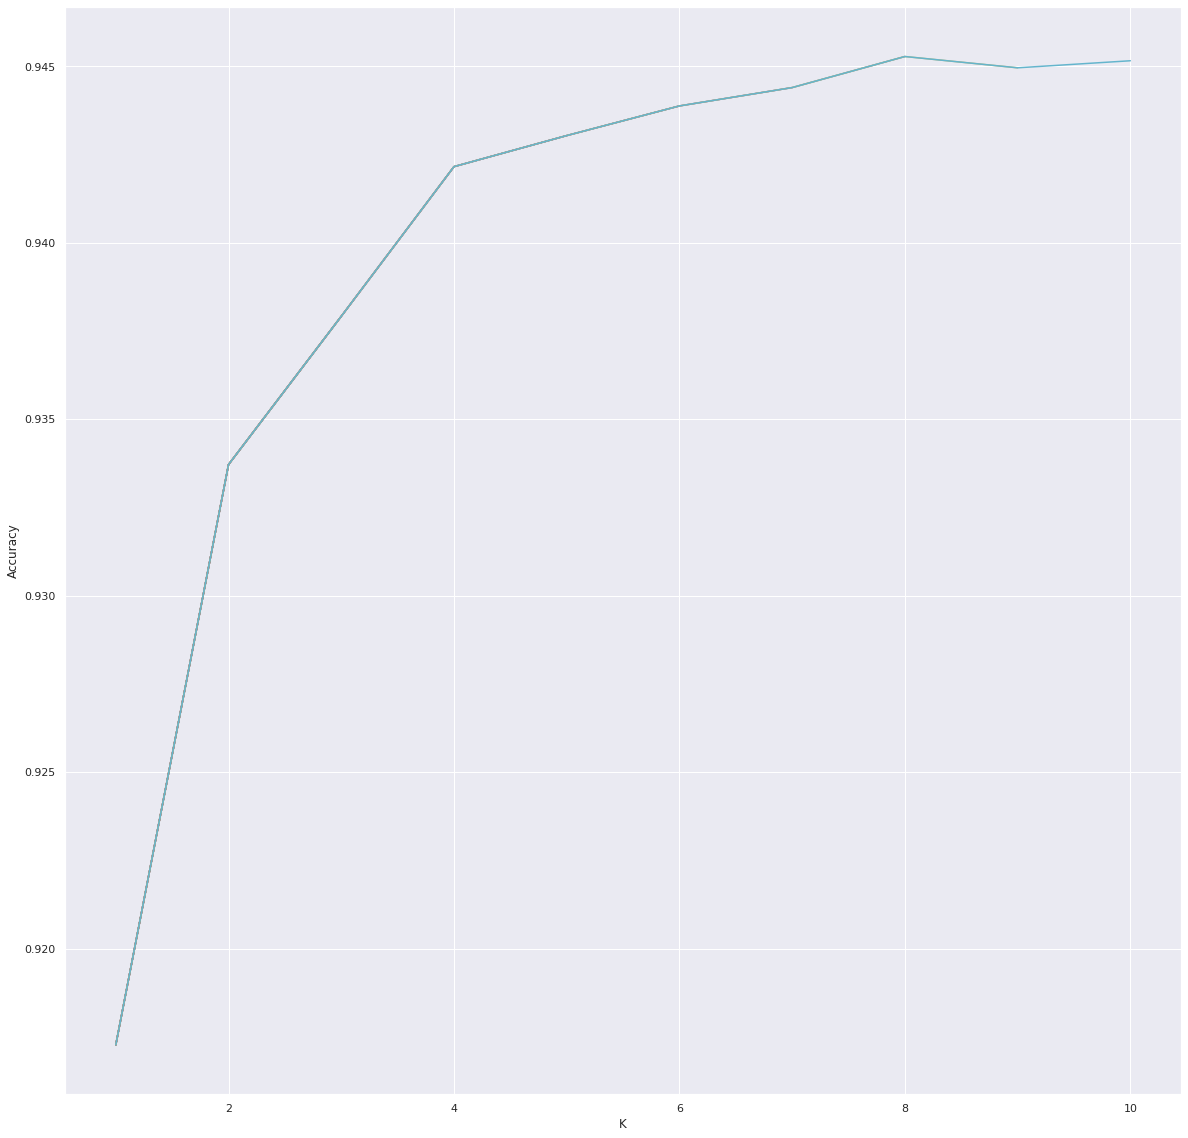

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

lis = [1,2,3,4,5,6,7,8,9,10]

acc_rmse = pd.DataFrame(columns=["K","Accuracy", "RMSE"])
for i in lis:
  k = i
  neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
  pred_y = neigh.predict(X_test)
  acc_rmse = acc_rmse.append({'K': i, 'Accuracy': metrics.accuracy_score(y_test, pred_y), 'RMSE':metrics.mean_squared_error(y_test, pred_y)}, ignore_index=True)
  sns.lineplot(data=acc_rmse, x="K", y="Accuracy")

In [ ]:
acc_rmse

K  Accuracy     RMSE
0   1.0   0.91728  0.22664
1   2.0   0.93372  0.16380
2   3.0   0.93792  0.16628
3   4.0   0.94216  0.15164
4   5.0   0.94304  0.15060
5   6.0   0.94388  0.14860
6   7.0   0.94440  0.14832
7   8.0   0.94528  0.14588
8   9.0   0.94496  0.14564
9  10.0   0.94516  0.14520

Implementing KNN-Classification Model with n_neighbours = 10 yielding the best accuracy.

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)

Pred_y = neigh.predict(X_test)

acc_knn = accuracy_score(y_test,Pred_y)
# acc_knn = mean_squared_error(y_test, pred_y)

Predicted_Y = pd.DataFrame(Pred_y).rename(columns ={0:'Predicted Y'})

In [ ]:
Predicted_Y

Predicted Y
0                2
1                2
2                2
3                2
4                2
...            ...
24995            2
24996            2
24997            2
24998            2
24999            2

[25000 rows x 1 columns]

In [ ]:
cm_knn= confusion_matrix(y_test, Pred_y, labels=Predicted_Y['Predicted Y'].values, sample_weight=None, normalize=None)

In [ ]:
# cm_knn

In [ ]:
# import pylab as pl

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# disp = ConfusionMatrixDisplay(confusion_matrix = cm_knn)
# disp.plot()
# plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    Pred_y,
    display_labels=["1", "2", "3", "4"],
    cmap='YlOrRd',
    ax=ax,
    colorbar=False).ax_.set(
                title='K-NN Classification Confusion Matrix')
plt.savefig("cm_knn", dpi=300)  # save the plot
plt.show()

In [ ]:
# # # plt.figure(figsize=(16,9))
# # # ax = sns.heatmap(cm_knn)
# # # plt.yticks(rotation=0)
# # # plt.show()

# sns.heatmap(cm_knn, square=True, annot=True, fmt='d', cbar=False, linewidths=.5)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Pred_y))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision_knn,recall_knn,fscore_knn,support_knn=score(y_test,Pred_y,average='macro')

fscore_knn

In [ ]:
clf_en = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 6).fit(X_train,y_train)
y_pred_tree = clf_en.predict(X_test)
acc_dt = metrics.accuracy_score(y_test, y_pred_tree)

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_tree, labels=None, sample_weight=None, normalize=None)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_tree,
    display_labels=["1", "2", "3", "4"],
    cmap='YlOrRd',
    ax=ax,
    colorbar=False).ax_.set(
                title='Decision Tree Confusion Matrix')
plt.savefig("cm_dt", dpi=300)  # save the plot
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_tree))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision_dt,recall_dt,fscore_dt,support_dt=score(y_test,y_pred_tree,average='macro')

fscore_dt

In [ ]:
plt.figure(figsize=(25,10))
a = plot_tree(clf_en, 
              # feature_names = y_pred_tree.values_, 
              # class_names=y_train.columns, 
              filled=True, 
              rounded=True,
              fontsize=14)

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
 
y_pred_log = logmodel.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log, labels=None, sample_weight=None, normalize=None)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_log,
    display_labels=["1", "2", "3", "4"],
    cmap='YlOrRd',
    ax=ax,
    colorbar=False).ax_.set(
                title='Logistic Regression Confusion Matrix')
plt.savefig("cm_log", dpi=300)  # save the plot
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_log))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision_log,recall_log,fscore_log,support_log=score(y_test,y_pred_log,average='macro')

fscore_log

Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_nb  =  classifier.predict(X_test)
acc_naive = metrics.accuracy_score(y_test, y_pred_nb)

In [ ]:
cm_naive = confusion_matrix(y_test, y_pred_nb, labels=None, sample_weight=None, normalize=None)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_nb,
    display_labels=["1", "2", "3", "4"],
    cmap='YlOrRd',
    ax=ax,
    colorbar=False).ax_.set(
                title='Naive Bayes Confusion Matrix')
plt.savefig("cm_naive", dpi=300)  # save the plot
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_nb))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision_nb,recall_nb,fscore_nb,support_nb=score(y_test,y_pred_nb,average='macro')

fscore_nb

Support Vector Machine Model

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

acc_svm = metrics.accuracy_score(y_test, y_pred_svm)

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=None, sample_weight=None, normalize=None)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_svm,
    display_labels=["1", "2", "3", "4"],
    cmap='YlOrRd',
    ax=ax,
    colorbar=False).ax_.set(
                title='Support Vector Machine Confusion Matrix')
plt.savefig("cm_svm", dpi=300)  # save the plot
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_svm))

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision_svm,recall_svm,fscore_svm,support_svm=score(y_test,y_pred_svm,average='macro')

precision_svm

Comparison of all implement models based on different parameters.

In [ ]:
df_accuracy = pd.DataFrame({acc_knn, acc_dt, acc_log, acc_naive, acc_svm}).transpose().rename(columns = {0:'Acc_KNN', 1:'Acc_DT', 2:'Acc_Log', 3:'Acc_SVM', 4:'Acc_Naive'}).transpose()
df_accuracy = df_accuracy.reset_index().rename(columns={'index':'Model',0:'Accuracy'})
df_accuracy['Accuracy'] = df_accuracy['Accuracy'].apply(lambda x: x*100)
df_accuracy

In [ ]:
sns.barplot(data=df_accuracy, x='Model',y='Accuracy')

In [ ]:
df_precision = pd.DataFrame({precision_knn, precision_dt, precision_log, precision_nb, precision_svm}).transpose().rename(columns = {0:'Precision KNN', 1:'Precision DT', 2:'Precision Log', 3:'Precision NB', 4:'Precision_SVM'}).transpose()
df_precision = df_precision.reset_index().rename(columns={'index':'Model',0:'Precision'})
# df_precision['Precision'] = df_accuracy['Precision'].apply(lambda x: x*100)
df_precision

In [ ]:
sns.barplot(data=df_precision, x='Model',y='Precision')

In [ ]:
df_f1score = pd.DataFrame({fscore_knn, fscore_dt, fscore_log, fscore_nb, fscore_svm}).transpose().rename(columns = {0:'F1 Score KNN', 1:'F1 Score DT', 2:'F1 Score Log', 3:'F1 Score NB', 4:'F1 Score'}).transpose()
df_f1score = df_f1score.reset_index().rename(columns={'index':'Model',0:'F1 Score'})
# df_precision['Precision'] = df_accuracy['Precision'].apply(lambda x: x*100)
df_f1score

In [ ]:
sns.barplot(data=df_f1score, x='Model',y='F1 Score')